import thư viện

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(130301)

# 1: Load dữ liệu 

In [3]:
df = pd.read_csv('train.csv')

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df = df.drop('Id', axis=1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0          60       RL         65.0     8450   Pave   NaN      Reg  \
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature   
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN  \
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [6]:
columns_with_null = df.columns[df.isnull().any()]
print(columns_with_null)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [7]:
# Danh sách các cột cần kiểm tra
columns_to_check = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
                    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                    'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
                    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
                    'MiscFeature']

# Lặp qua từng cột và in ra giá trị non-null
for column in columns_to_check:
    non_null_values = df[column].dropna().unique()
    print(f"Các giá trị non-null trong cột '{column}':")
    print(non_null_values)
    print()


Các giá trị non-null trong cột 'LotFrontage':
[ 65.  80.  68.  60.  84.  85.  75.  51.  50.  70.  91.  72.  66. 101.
  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52. 100.
  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40. 105.
  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92. 134.
  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.  93.
  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.  36.
  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39. 144.
 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

Các giá trị non-null trong cột 'Alley':
['Grvl' 'Pave']

Các giá trị non-null trong cột 'MasVnrType':
['BrkFace' 'Stone' 'BrkCmn']

Các giá trị non-null trong cột 'MasVnrArea':
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.0

Khá nhiều cột chứa null.
Đa số các cột đó chứa các biến định tính

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\BACH\AppData\Local\Temp\ipykernel_17372\3453550780.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


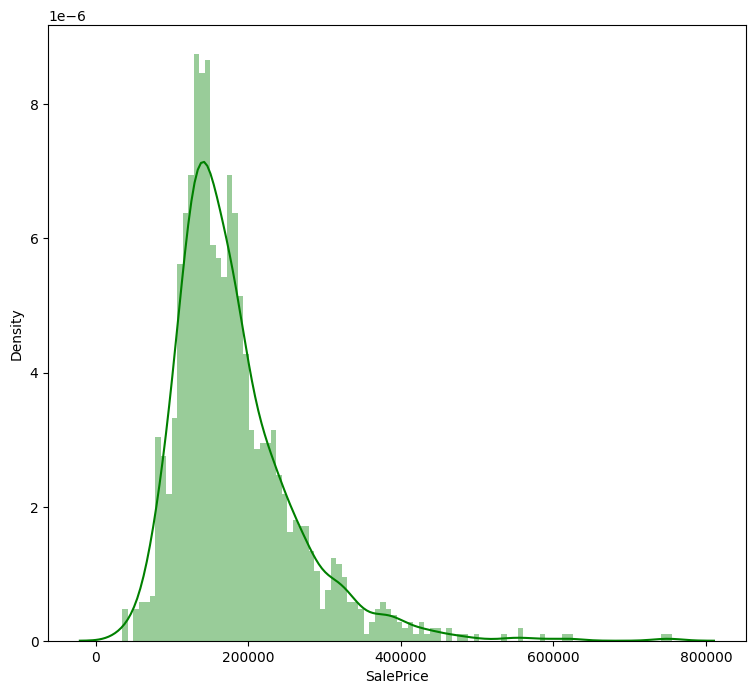

In [8]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

Giá nhà chủ yếu nằm vào khoảng 200k

In [9]:
# Không biết xử lí null nên bỏ hết các cột đó

df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.info()
df_num.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt   
0          60         65.0     8450            7            5       2003  \
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF   
0          2003       196.0         706           0  ...           0  \
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal   
0           61              0          0            0         0        0  \
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

In [10]:
columns_null = df_num.columns[df_num.isnull().any()]
print(columns_null)

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


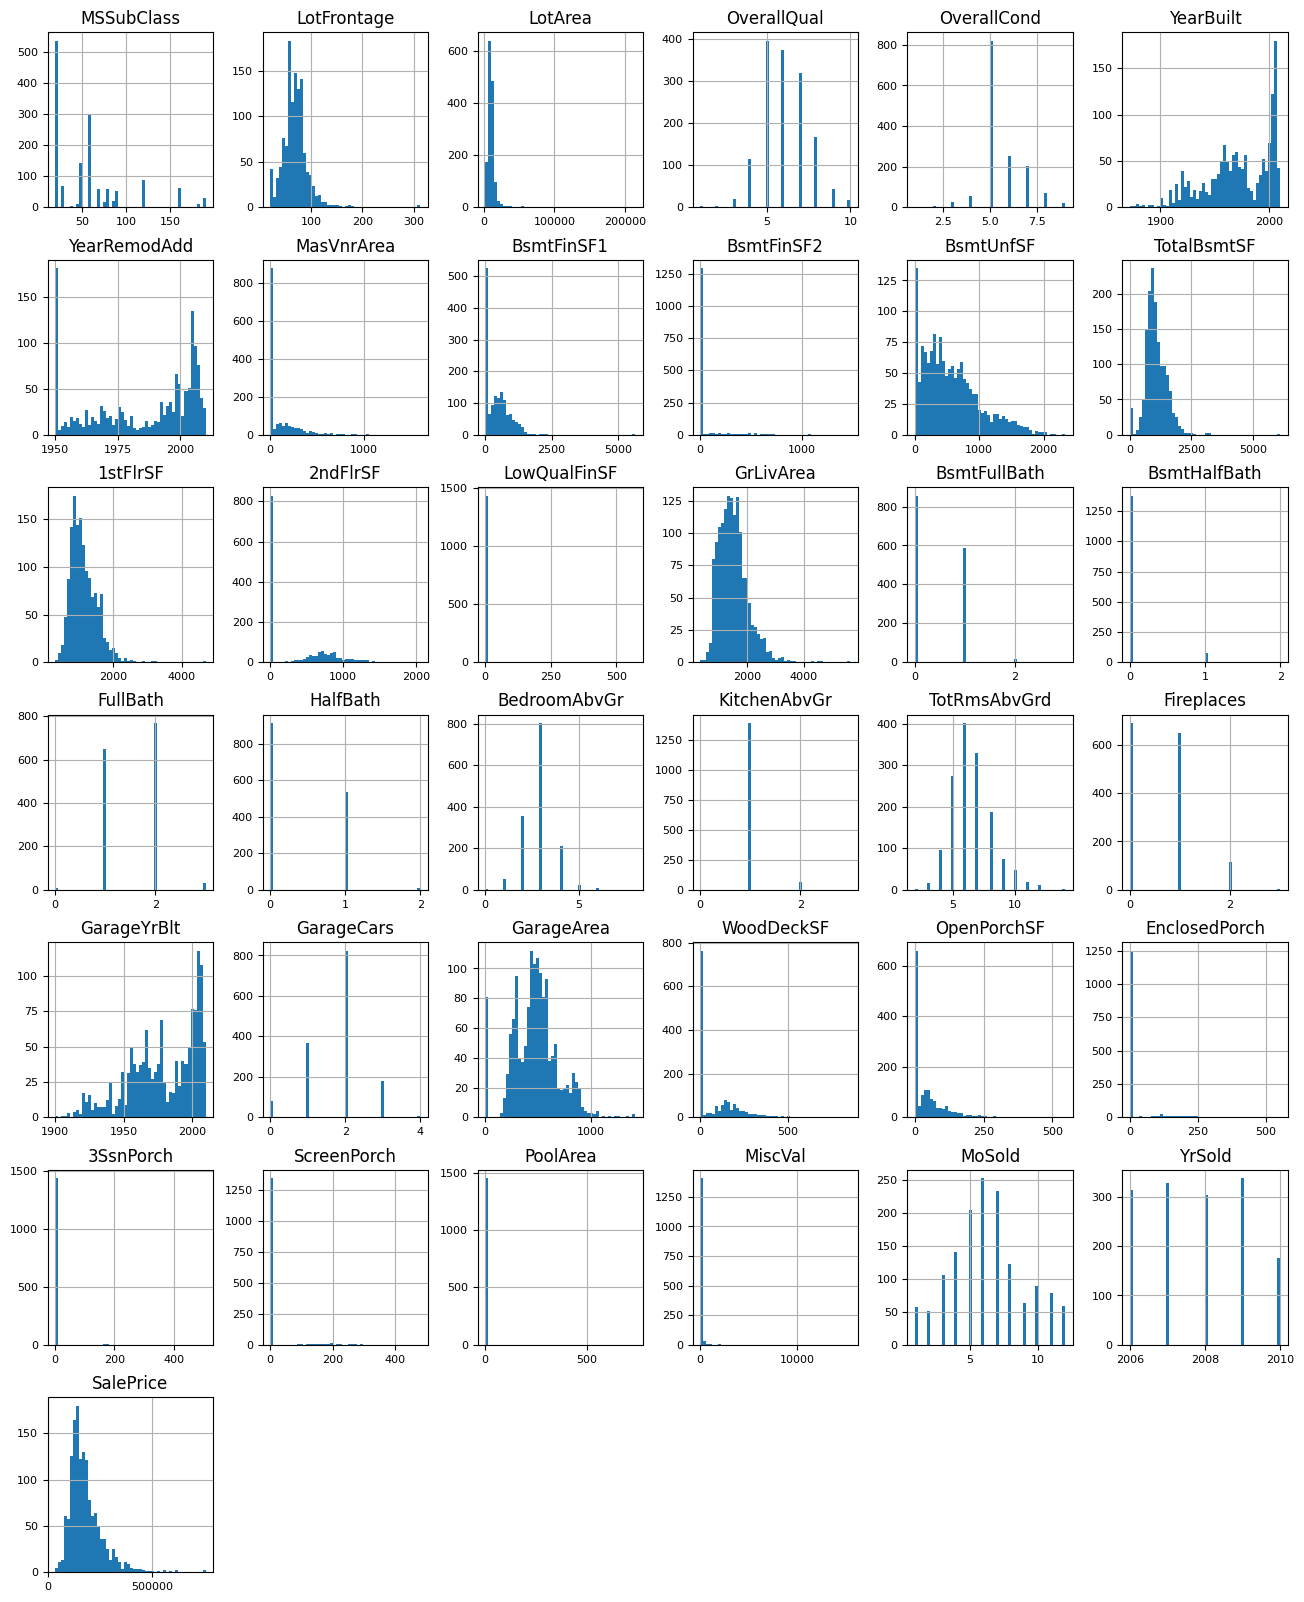

In [11]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [23]:
# Lấy cột "LotFrontage" của DataFrame làm Series
lotfrontage_series = df_num["LotFrontage"]

# Tính giá trị trung vị của cột "LotFrontage" (loại bỏ các giá trị NaN)
lotfrontage_median = lotfrontage_series.median()

# Điền các giá trị NaN trong cột "LotFrontage" bằng giá trị trung vị
df_num["LotFrontage"].fillna(lotfrontage_median, inplace=True)


In [24]:
# Lấy cột "MasVnrArea" của DataFrame làm Series
masvnrarea_series = df_num["MasVnrArea"]

# Tính giá trị mode (chế độ) của cột "MasVnrArea" (loại bỏ các giá trị NaN)
masvnrarea_mode = masvnrarea_series.mode()[0]

# Điền các giá trị NaN trong cột "MasVnrArea" bằng giá trị mode
df_num["MasVnrArea"].fillna(masvnrarea_mode, inplace=True)


In [26]:
# Get the "GarageYrBlt" column of the DataFrame as a Series
garageyrblt_series = df_num["GarageYrBlt"]

# Calculate the mode (most frequent value) of the "GarageYrBlt" column (excluding NaN values)
garageyrblt_mode = garageyrblt_series.mode()[0]

# Fill NaN values in the "GarageYrBlt" column with the mode
df_num["GarageYrBlt"].fillna(garageyrblt_mode, inplace=True)


In [38]:
from sklearn.model_selection import train_test_split

# Chia tập dữ liệu thành features (X) và target (y)
X = df_num.drop("SalePrice", axis=1)
y = df_num["SalePrice"]

# Chia features và target thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Kích thước X_train: (1168, 36)
Kích thước y_train: (1168,)
Kích thước X_test: (292, 36)
Kích thước y_test: (292,)


# 2: Fit model

In [39]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [46]:
from sklearn.metrics import mean_squared_error

# Dự đoán giá trị trên tập train
y_train_pred = model.predict(X_train)

# Tính toán loss trên tập train
train_loss = mean_squared_error(y_train, y_train_pred)
print("Train Loss:", train_loss)

# Dự đoán giá trị trên tập test
y_test_pred = model.predict(X_test)

# Tính toán loss trên tập test
test_loss = mean_squared_error(y_test, y_test_pred)
print("Test Loss:", test_loss)


Train Loss: 135958087.08941144
Test Loss: 826209448.5519259


## Fine Tune model

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Xác định các siêu tham số cần tối ưu và giá trị của chúng
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Khởi tạo mô hình Random Forest Regression
model = RandomForestRegressor()

# Tạo GridSearchCV với mô hình và siêu tham số đã xác định
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error')

# Tiến hành tìm kiếm siêu tham số tốt nhất
grid_search.fit(X_train, y_train)

# Lấy ra mô hình tốt nhất đã tìm kiếm được
best_model = grid_search.best_estimator_

# Dự đoán giá trị trên tập test sử dụng mô hình tốt nhất
y_test_pred = best_model.predict(X_test)

# Tính toán MSE loss trên tập test
test_loss = mean_squared_error(y_test, y_test_pred)
print("Test Loss:", test_loss)

# In ra các siêu tham số tốt nhất đã tìm kiếm được
print("Best Parameters:", grid_search.best_params_)


Test Loss: 859708599.4231609
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# Optional: Tối ưu với các loss

## MAPE

In [6]:
...

Ellipsis

## RMSE

In [5]:
...

Ellipsis

## MAE

In [7]:
...

Ellipsis